<a href="https://colab.research.google.com/github/ArtMla/MNIST-Image-classification/blob/main/MNIST_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Loading and Exploration
In this phase, we load the MNIST dataset and visualize sample images to understand the structure and shape of the data. MNIST consists of 28x28 grayscale images of handwritten digits ranging from 0 to 9.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## 1.1 Visualizing Sample Digits
Below are the first 9 samples from the training dataset, showing the handwritten digits and their corresponding labels.

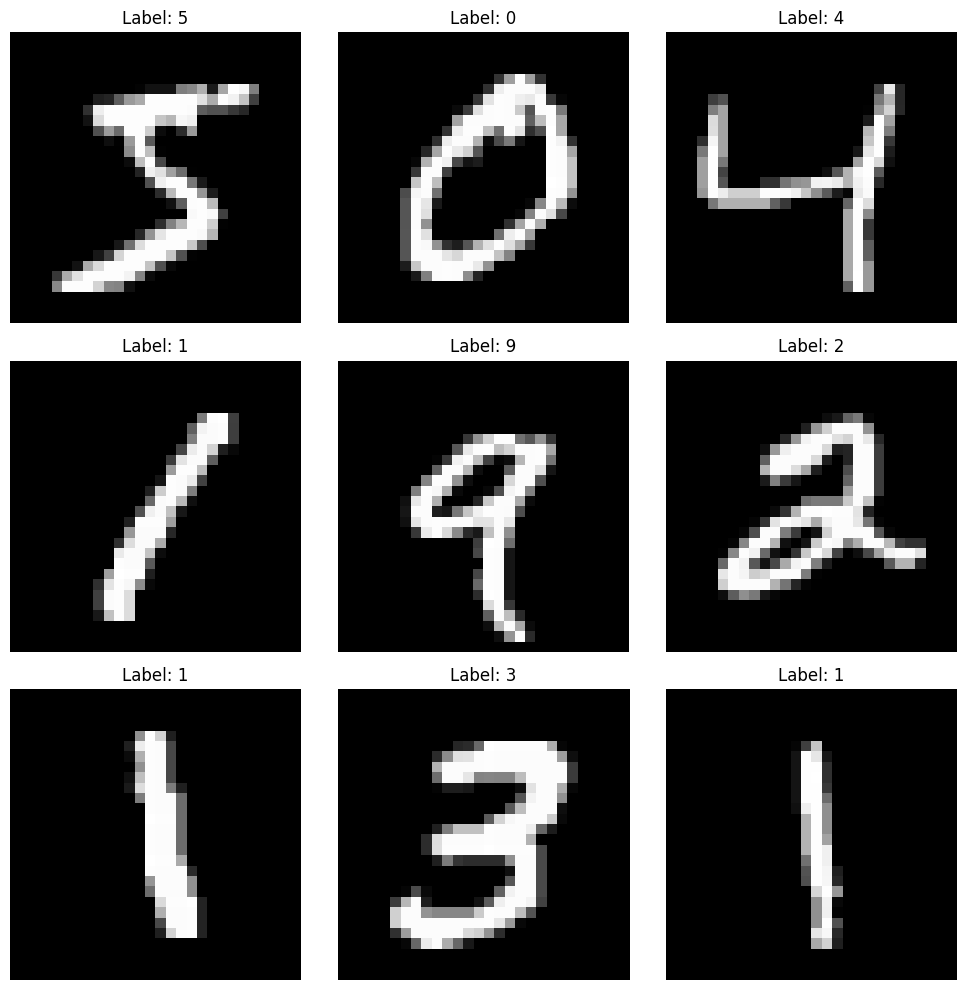

In [4]:
# Show the first 9 digits
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 2: Pre-processing

To prepare the MNIST data for training, we perform the following preprocessing steps:



*   Normalization: Scales pixel values from [0, 255] to [0, 1] for faster
convergence.
*   Flattening: Converts each 28x28 image into a 784-dimensional vector for input into dense layers.
*   One-hot Encoding: Transforms digit labels (0–9) into binary vectors suitable for multi-class classification.


In [5]:
# Normalise the pixels to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images into 784-dimension vectors
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Confirm the shape
print("Flattened training data shape:", x_train_flat.shape)
print("Flattened test data shape:", x_test_flat.shape)



Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [8]:
# Build Model A with ReLU activation
model_relu = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model_relu.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_relu.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Model B – Neural Network with Tanh Activation
This model uses the Tanh activation function in all hidden layers. Tanh outputs values between -1 and 1 and is zero-centered, which can sometimes result in better weight updates than ReLU for certain datasets. However, it is prone to vanishing gradients in deep networks.

Architecture:



* Input layer: 784 units (flattened image)
*  Hidden Layer 1: 128 neurons, Tanh
*  Hidden Layer 2: 64 neurons, Tanh






In [9]:
# Build Model B with Tanh activation
model_tanh = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(10, activation='softmax')
])

# Compile the model
model_tanh.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_tanh.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Model Training
In this phase, we train both models using the same training configuration to ensure a fair comparison. We use 20% of the training data as a validation set to monitor model performance during training.

## 4.1 Training Model A – ReLU
Model A is trained for 20 epochs with a batch size of 128 using the Adam optimizer. We track training and validation accuracy and loss to identify signs of overfitting or underfitting.

In [10]:
# Train Model A (ReLU)
history_relu = model_relu.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7847 - loss: 0.7218 - val_accuracy: 0.9458 - val_loss: 0.1850
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9498 - loss: 0.1693 - val_accuracy: 0.9590 - val_loss: 0.1434
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9675 - loss: 0.1095 - val_accuracy: 0.9632 - val_loss: 0.1292
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9753 - loss: 0.0817 - val_accuracy: 0.9705 - val_loss: 0.0999
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9800 - loss: 0.0635 - val_accuracy: 0.9696 - val_loss: 0.0970
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9853 - loss: 0.0485 - val_accuracy: 0.9707 - val_loss: 0.0958
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9884 - loss: 0.0379 - val_accuracy: 0.9718 - val_loss: 0.0976
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9893 - loss: 0.0324 - val_accuracy: 0.

## 🔍 Observations from Training (Model A – ReLU)

*   Model A using ReLU activation reached a training accuracy of 99.49% and a validation accuracy of 97.55% by epoch 20.

*   The model showed fast initial convergence, achieving over 95% validation accuracy by epoch 3 — consistent with ReLU's known advantage in speeding up learning.

*   However, after around epoch 6–7, validation loss began to fluctuate or increase, while training accuracy continued to rise — a classic sign of overfitting.
*   This supports the theoretical behavior of ReLU:
    - Fast learning due to non-saturating gradients
    - But more prone to overfitting if not regularized


*   Despite slight overfitting, the final validation accuracy remained high, making ReLU an effective choice — though some tuning may help reduce generalization error.

The next phase, we will compare this behavior visually with the Tanh model.



## 4.2 Training Model B – Tanh
This model uses the same architecture, optimizer (Adam), and training configuration as the ReLU-based model to ensure a fair comparison. The only difference is the use of the Tanh activation function in the hidden layers.

Tanh outputs values between -1 and 1, and being zero-centered can sometimes lead to better convergence during optimization. However, it is more susceptible to the vanishing gradient problem compared to ReLU, especially in deeper networks.

We will track accuracy and loss across 20 epochs using 20% of the training data for validation.

In [11]:
# Train Model B (Tanh)
history_tanh = model_tanh.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8264 - loss: 0.6787 - val_accuracy: 0.9353 - val_loss: 0.2286
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9460 - loss: 0.1908 - val_accuracy: 0.9591 - val_loss: 0.1445
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9639 - loss: 0.1266 - val_accuracy: 0.9659 - val_loss: 0.1203
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9742 - loss: 0.0874 - val_accuracy: 0.9673 - val_loss: 0.1121
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9810 - loss: 0.0682 - val_accuracy: 0.9690 - val_loss: 0.0997
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9852 - loss: 0.0527 - val_accuracy: 0.9709 - val_loss: 0.0957
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9879 - loss: 0.0428 - val_accuracy: 0.9741 - val_loss: 0.0863
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9916 - loss: 0.0303 - val_accuracy: 0.

##🔍 Observations from Training (Model B – Tanh)



*   The model using Tanh activation achieved a training accuracy of 99.85% and a validation accuracy of 97.68% by epoch 20.
*   Validation accuracy steadily increased throughout training, peaking at epoch 19 — suggesting more stable convergence compared to ReLU.

*   Despite higher accuracy, there is some validation loss fluctuation in later epochs, indicating mild overfitting.
*   Compared to ReLU, Tanh showed a slower but steadier performance, which aligns with its theoretical behavior:
    - Tanh is zero-centered and smooth, which can help training
    - But it's more prone to vanishing gradients, especially in deeper layers

*   Overall, Tanh handled the task well, and may benefit further from techniques like early stopping or regularization.


We will visualize and compare both models in Phase 5.



# Step 5: Evaluation and Visualization
In this phase, we evaluate both models by plotting their training and validation accuracy and loss over 20 epochs. This visual comparison helps identify differences in convergence speed, generalization ability, and signs of overfitting.

## 5.1 Accuracy Comparison
The plot below compares the training and validation accuracy of both ReLU and Tanh models across all epochs. This helps visualize which model learned faster and which generalized better on unseen data.

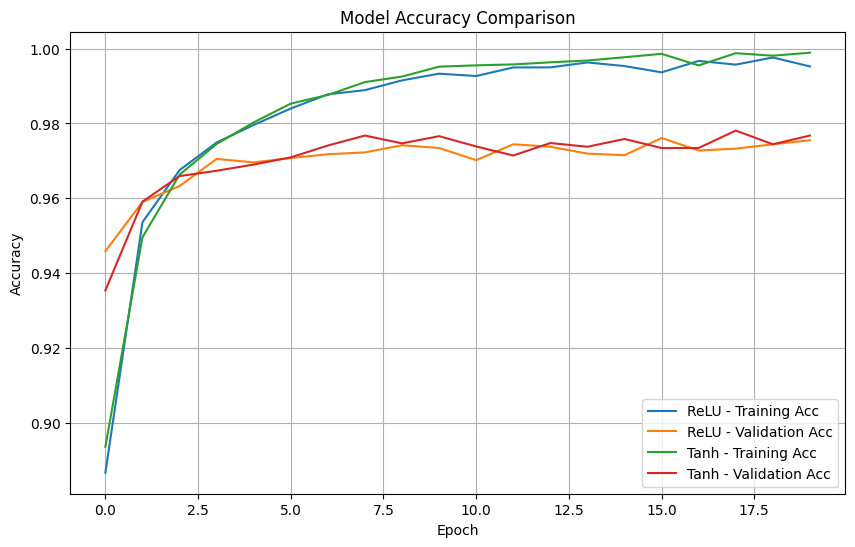

In [12]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_relu.history['accuracy'], label='ReLU - Training Acc')
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Validation Acc')
plt.plot(history_tanh.history['accuracy'], label='Tanh - Training Acc')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh - Validation Acc')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 5.2 Loss Comparison
The following plot compares the training and validation loss for both models. A rising validation loss while training loss continues to fall typically indicates overfitting.

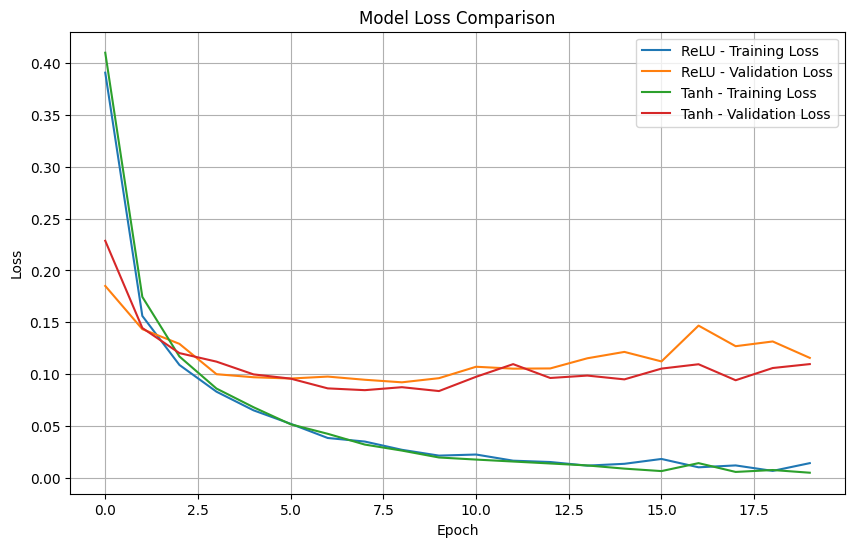

In [13]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history_relu.history['loss'], label='ReLU - Training Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU - Validation Loss')
plt.plot(history_tanh.history['loss'], label='Tanh - Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh - Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Comparative Analysis and Justification
Based on training results and visual evaluation, we summarize the following key differences between ReLU and Tanh activation functions:

##✅ ReLU Highlights

*   Achieved validation accuracy of 97.55%
*   Faster convergence — high accuracy within the first few epochs
*   Showed signs of overfitting after ~epoch 7 (val loss ↑ while training acc ↑)
*   Performs very well, but could benefit from regularization


##✅ Tanh Highlights


*   Achieved a slightly higher validation accuracy of 97.68%
*   More stable training — validation metrics were smoother and less volatile
*   Better generalization, with lower overfitting than ReLU
*   Slightly slower to converge in early epochs


##🧠 Conclusion

Both ReLU and Tanh performed very well, with Tanh showing slightly better validation accuracy and less overfitting in this setup. However, ReLU trained faster and may still outperform with proper regularization or early stopping.

This analysis highlights the importance of activation function choice, especially in deeper networks, where trade-offs between convergence speed and generalization must be carefully balanced.

#Step 7 ReLU Model with SGD Optimizer and L2 Regularization
In this experiment, we replace the Adam optimizer with Stochastic Gradient Descent (SGD) to observe whether slower, more stable learning improves generalization.

Additionally, we apply L2 regularization (penalty = 0.001) on all hidden layers to penalize large weights and reduce overfitting.

We expect SGD to train more slowly than Adam but potentially show more stable validation accuracy. L2 should also help reduce the widening gap between training and validation loss observed in earlier experiments.

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# 7.1 ReLU + SGD + L2 Regularization
model_relu_sgd = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile
model_relu_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_relu_sgd = model_relu_sgd.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2938 - loss: 2.3946 - val_accuracy: 0.7950 - val_loss: 1.2258
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8143 - loss: 1.0917 - val_accuracy: 0.8817 - val_loss: 0.8004
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8801 - loss: 0.8015 - val_accuracy: 0.9029 - val_loss: 0.7052
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8965 - loss: 0.7189 - val_accuracy: 0.9142 - val_loss: 0.6607
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9088 - loss: 0.6744 - val_accuracy: 0.9205 - val_loss: 0.6331
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9145 - loss: 0.6469 - val_accuracy: 0.9233 - val_loss: 0.6149
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9194 - loss: 0.6261 - val_accuracy: 0.9275 - val_loss: 0.5958
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9267 - loss: 0.6016 - val_accuracy: 0.

##🔍 Observation – 7.1 ReLU + SGD + L2
This model showed slower learning initially (as expected with SGD), but both training and validation accuracy steadily improved. By epoch 20, both accuracies reached 95.6%, indicating strong generalization and minimal overfitting.

Compared to the original ReLU + Adam model:


*   SGD was slower to converge but more stable
*   L2 regularization (penalty = 0.001) helped avoid overfitting, as seen from tightly tracking val/train accuracies

*   Final loss values remained higher due to the penalty term added by L2



✅ This configuration offers better control over generalization and is a strong candidate for production-ready training.

##7.2 ReLU Model with SGD (lr=0.05), L2 Regularization and EarlyStopping
In this refinement of our earlier SGD experiment, we make three key changes:


*   We increase the learning rate to 0.05 to allow faster convergence (as SGD is slower than Adam).
*   We retain L2 regularization (0.001) to reduce overfitting.
*   We add EarlyStopping to stop training once validation loss stops improving, restoring the best weights.

This combination helps balance generalization and training speed. We'll compare accuracy, loss, and stability to earlier ReLU configurations.

In [17]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# 7.2 ReLU + SGD (lr=0.05) + L2 + EarlyStopping
model_relu_sgd_opt = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile with custom learning rate
sgd_optimizer = SGD(learning_rate=0.05)
model_relu_sgd_opt.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_relu_sgd_opt = model_relu_sgd_opt.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6253 - loss: 1.6008 - val_accuracy: 0.9092 - val_loss: 0.6661
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9066 - loss: 0.6656 - val_accuracy: 0.9318 - val_loss: 0.5755
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9290 - loss: 0.5709 - val_accuracy: 0.9452 - val_loss: 0.5145
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9437 - loss: 0.5065 - val_accuracy: 0.9513 - val_loss: 0.4741
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9507 - loss: 0.4663 - val_accuracy: 0.9552 - val_loss: 0.4514
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9583 - loss: 0.4292 - val_accuracy: 0.9525 - val_loss: 0.4432
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9603 - loss: 0.4048 - val_accuracy: 0.9607 - val_loss: 0.3995
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9677 - loss: 0.3716 - val_accuracy: 0.

##✅ Observations: ReLU + SGD (lr=0.05) + L2 + EarlyStopping
This configuration showed significant improvement over the default ReLU + SGD run. Increasing the learning rate to 0.05 allowed the model to converge faster and deeper, while L2 regularization helped control weight magnitudes.

Key takeaways:

*   The model achieved a validation accuracy of 97.37%, improving by almost 2% over the previous configuration.
*   Training and validation curves stayed close, indicating minimal overfitting.

*   Validation loss consistently dropped till the final epoch, validating the effectiveness of learning rate tuning.


This setup serves as a strong benchmark for the ReLU activation function, and will be compared later to its tanh-based counterpart.

##7.3 ReLU – SGD (lr 0.05, momentum 0.9, Nesterov) + L2 (0.0005)
We add momentum/Nesterov to accelerate convergence and reduce oscillations, and slightly lower the L2 penalty to allow more weight flexibility while still controlling overfitting.



In [18]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, layers

model_relu_sgd_mom = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(10, activation='softmax')
])

optimizer_mom = SGD(learning_rate=0.05, momentum=0.9, nesterov=True)
model_relu_sgd_mom.compile(optimizer=optimizer_mom,
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3,
                           restore_best_weights=True)

history_relu_sgd_mom = model_relu_sgd_mom.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7754 - loss: 0.8851 - val_accuracy: 0.9504 - val_loss: 0.3274
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9590 - loss: 0.2930 - val_accuracy: 0.9614 - val_loss: 0.2622
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9706 - loss: 0.2271 - val_accuracy: 0.9611 - val_loss: 0.2424
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9765 - loss: 0.1928 - val_accuracy: 0.9607 - val_loss: 0.2305
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9790 - loss: 0.1690 - val_accuracy: 0.9680 - val_loss: 0.2057
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9841 - loss: 0.1469 - val_accuracy: 0.9716 - val_loss: 0.1873
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9825 - loss: 0.1447 - val_accuracy: 0.9718 - val_loss: 0.1700
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.1322 - val_accuracy: 0.